# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15 # converting Kelvin to Celsius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | birao
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | atar
Processing Record 10 of Set 1 | hammerfest
Processing Record 11 of Set 1 | kilju
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | minas de marcona
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | port moresby
Processing Record 19 of Set 1 | fale old settlement
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,20.77,100,75,3.60,US,1691583933
1,hermanus,-34.4187,19.2345,21.00,62,0,3.75,ZA,1691584009
2,arraial do cabo,-22.9661,-42.0278,21.92,78,75,6.69,BR,1691583930
3,petropavlovsk-kamchatsky,53.0452,158.6483,14.33,72,40,2.00,RU,1691584010
4,adamstown,-25.0660,-130.1015,20.44,68,93,12.14,PN,1691584010


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("../output/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("../output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,20.77,100,75,3.60,US,1691583933
1,hermanus,-34.4187,19.2345,21.00,62,0,3.75,ZA,1691584009
2,arraial do cabo,-22.9661,-42.0278,21.92,78,75,6.69,BR,1691583930
3,petropavlovsk-kamchatsky,53.0452,158.6483,14.33,72,40,2.00,RU,1691584010
4,adamstown,-25.0660,-130.1015,20.44,68,93,12.14,PN,1691584010


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

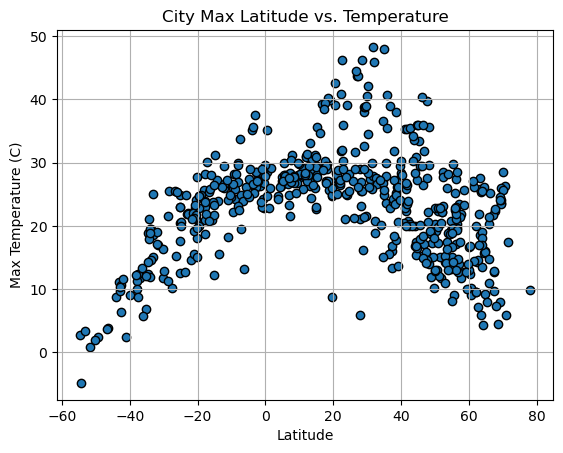

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

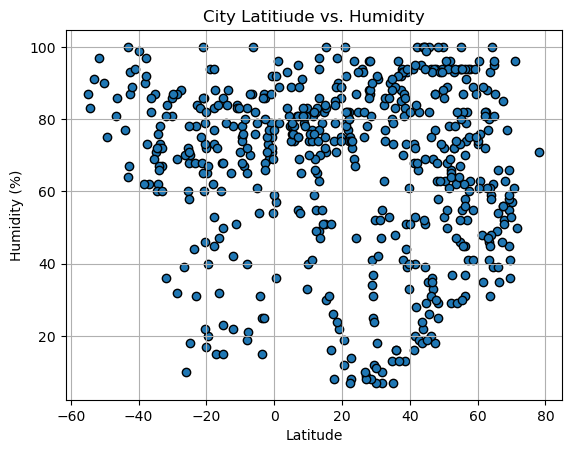

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitiude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

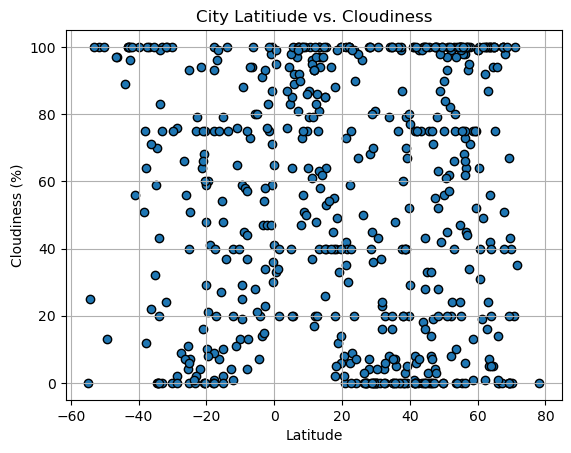

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitiude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

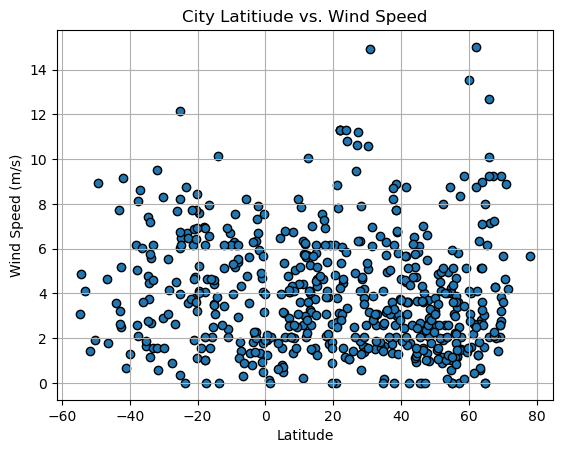

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitiude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def plot_regression(x_values, y_values, x_label, y_label, x_text, y_text):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    eq_str = f"y = {slope:.2f}x "
    if intercept < 0:
        intercept *= -1
        eq_str += f" - {intercept:.2f}"
    elif intercept > 0:
        eq_str += f" + {intercept:.2f}"
    regress_values = slope * x_values + intercept
    print(f"The r-value is {rvalue}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.text(x_text, y_text, eq_str, color="red", fontsize="x-large")

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,20.77,100,75,3.60,US,1691583933
3,petropavlovsk-kamchatsky,53.0452,158.6483,14.33,72,40,2.00,RU,1691584010
5,thompson,55.7435,-97.8558,9.09,87,75,3.09,CA,1691583972
6,birao,10.2849,22.7882,27.65,74,79,3.61,CF,1691584010
7,longyearbyen,78.2186,15.6401,9.91,71,0,5.66,SJ,1691584010


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,21.00,62,0,3.75,ZA,1691584009
2,arraial do cabo,-22.9661,-42.0278,21.92,78,75,6.69,BR,1691583930
4,adamstown,-25.0660,-130.1015,20.44,68,93,12.14,PN,1691584010
11,waitangi,-43.9535,-176.5597,8.79,77,89,3.58,NZ,1691584011
15,minas de marcona,-15.2119,-75.1103,12.29,86,79,3.52,PE,1691584011


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.5362077526710018


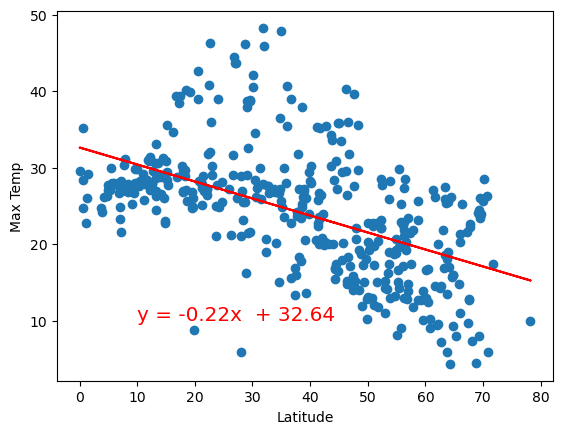

In [51]:
# Linear regression on Northern Hemisphere
plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", 10, 10)

The r-value is 0.8394201886296645


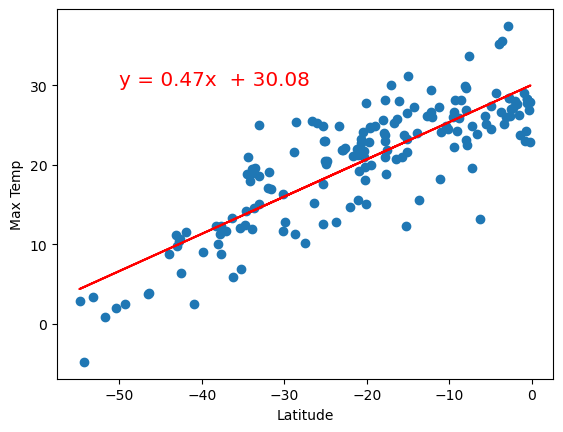

In [53]:
# Linear regression on Southern Hemisphere
plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", -50, 30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.07407803447415354


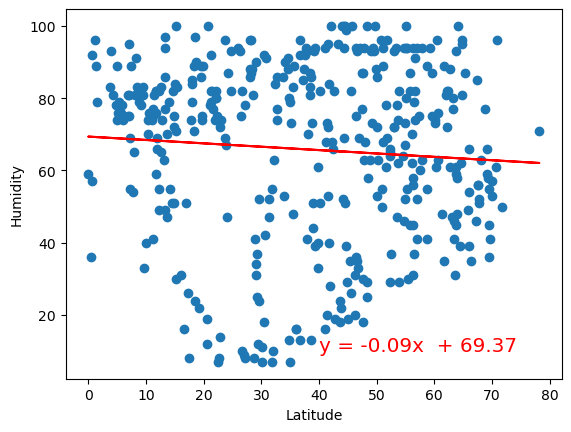

In [57]:
# Northern Hemisphere
plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", 40, 10)

The r-value is -0.21733373039675694


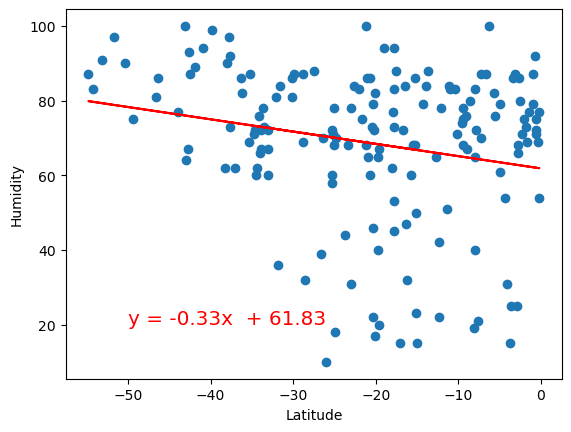

In [59]:
# Southern Hemisphere
plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", -50, 20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.08909576872388221


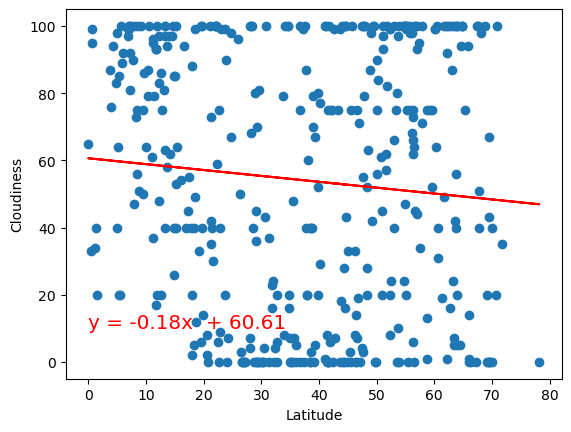

In [62]:
# Northern Hemisphere
plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 0, 10)

The r-value is -0.11207718010882911


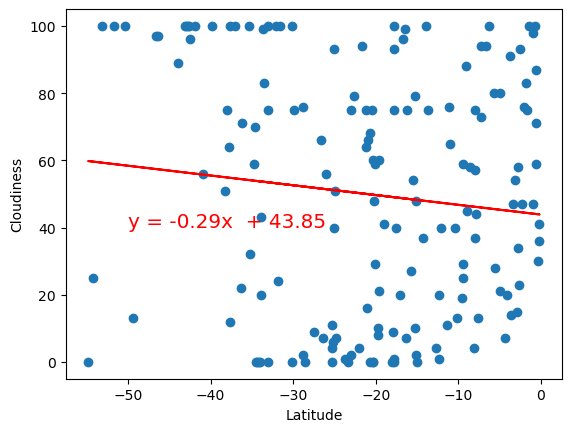

In [65]:
# Southern Hemisphere
plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", -50, 40)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.013521248378194836


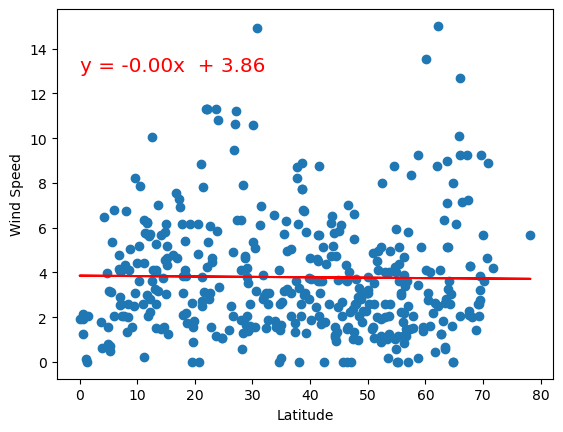

In [67]:
# Northern Hemisphere
plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", 0, 13)

The r-value is -0.03723255611344338


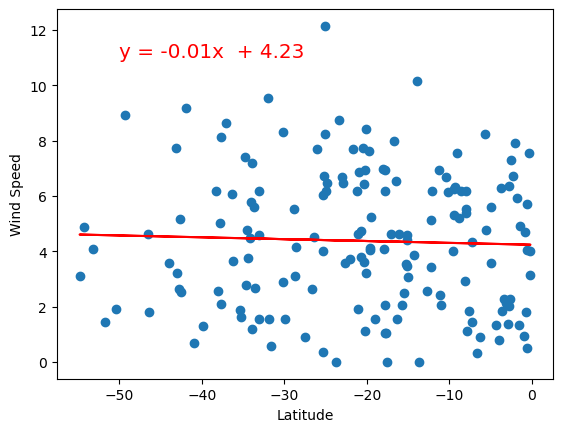

In [69]:
# Southern Hemisphere
plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", -50, 11)

**Discussion about the linear relationship:** YOUR RESPONSE HERE